# Import Libraries


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from IPython.display import display
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_colwidth', None)


# Data Loading


In [29]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

data = pd.read_csv(url, names=column_names, sep=",", skipinitialspace=True)


# Data Overview


In [30]:
print(data.head())

   age         workclass  fnlwgt  education  education-num      marital-status         occupation   relationship   race     sex  capital-gain  capital-loss  hours-per-week native-country income
0   39         State-gov   77516  Bachelors             13       Never-married       Adm-clerical  Not-in-family  White    Male          2174             0              40  United-States  <=50K
1   50  Self-emp-not-inc   83311  Bachelors             13  Married-civ-spouse    Exec-managerial        Husband  White    Male             0             0              13  United-States  <=50K
2   38           Private  215646    HS-grad              9            Divorced  Handlers-cleaners  Not-in-family  White    Male             0             0              40  United-States  <=50K
3   53           Private  234721       11th              7  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male             0             0              40  United-States  <=50K
4   28           Private  3384

In [31]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [32]:
print(data.describe())

           age     fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
count 32561.00   32561.00       32561.00      32561.00      32561.00        32561.00
mean     38.58  189778.37          10.08       1077.65         87.30           40.44
std      13.64  105549.98           2.57       7385.29        402.96           12.35
min      17.00   12285.00           1.00          0.00          0.00            1.00
25%      28.00  117827.00           9.00          0.00          0.00           40.00
50%      37.00  178356.00          10.00          0.00          0.00           40.00
75%      48.00  237051.00          12.00          0.00          0.00           45.00
max      90.00 1484705.00          16.00      99999.00       4356.00           99.00


In [33]:
non_numeric_columns = data.select_dtypes(exclude=['int64', 'float64']).columns

for column in non_numeric_columns:
    print(f"Unique values in {column} column:")
    print(data[column].unique())
    print("-" * 50)


Unique values in workclass column:
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
--------------------------------------------------
Unique values in education column:
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
--------------------------------------------------
Unique values in marital-status column:
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
--------------------------------------------------
Unique values in occupation column:
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
--------------------------------------------------
Uni

In [34]:
print("\nSummary statistics for non-numeric columns:")
print(data.describe(include=['object', 'category', 'bool']))


Summary statistics for non-numeric columns:
       workclass education      marital-status      occupation relationship   race    sex native-country income
count      32561     32561               32561           32561        32561  32561  32561          32561  32561
unique         9        16                   7              15            6      5      2             42      2
top      Private   HS-grad  Married-civ-spouse  Prof-specialty      Husband  White   Male  United-States  <=50K
freq       22696     10501               14976            4140        13193  27816  21790          29170  24720


# Cleaning the dataset


In [35]:
missing_values = (data == '?').sum()
data.replace('?', np.nan, inplace=True)

print(data.isnull().sum())


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


### 1. Potential Problems with the Education Column

The **education** column in the dataset represents different levels of education and could potentially be treated as an ordered categorical feature. However, after examining the nature of the data, I have decided **not** to apply **ordinal encoding** to this column. The reasoning behind this decision includes:

1. **Non-consistent Gaps Between Education Levels**:

   - The difference between adjacent levels of education may not always be consistent. For example, the gap between **"HS-grad"** and **"Some-college"** might differ from the gap between **"Bachelors"** and **"Masters"**. This inconsistency in the magnitude of gaps makes it challenging to represent education levels with a simple ordinal encoding.

2. **Non-linear Relationships**:

   - The relationship between education levels and the target variable (e.g., income) may not be linear. For example, the difference in income between **high school graduates** and **college graduates** may not be the same as the difference between **masters** and **doctorate** holders. This suggests that treating education as an ordinal feature may impose a misleading linear relationship.

3. **Different Interpretations of Education Levels**:

   - The interpretation of education levels may vary across different industries and contexts. For instance, a **Doctorate** may be viewed as a specialization rather than a continuation of the progression from **Masters**, especially in some fields. This could lead to problems with assuming a strict ordinal relationship between these categories.

4. **One-hot Encoding Preserves Independence**:
   - Given the potential non-linear relationships and the ambiguity around the interpretation of education levels, **one-hot encoding** allows each level to be treated as a distinct category. This method enables the model to independently learn the impact of each education level without assuming any artificial ordering or spacing between them.


In [36]:
# education_order = {
#     'Preschool': 1,
#     '1st-4th': 2,
#     '5th-6th': 3,
#     '7th-8th': 4,
#     '9th': 5,
#     '10th': 6,
#     '11th': 7,
#     '12th': 8,
#     'HS-grad': 9,
#     'Some-college': 10,
#     'Assoc-acdm': 11,
#     'Assoc-voc': 12,
#     'Bachelors': 13,
#     'Masters': 14,
#     'Doctorate': 15,
#     'Prof-school': 16
# }

# data['education'] = data['education'].map(education_order)

### 2. Potential Problems with the Relationship Column

Upon reviewing the **relationship** column, we observed that it contains specific gendered terms such as **"Husband"** and **"Wife"**, while the dataset also contains a separate **sex** column. Ideally, the "relationship" and "sex" columns should not contradict each other.

However, after checking, we found **inconsistencies**:


In [37]:
inconsistent_wife = data[(data['relationship'] == 'Wife') & (data['sex'] == 'Male')]
inconsistent_husband = data[(data['relationship'] == 'Husband') & (data['sex'] == 'Female')]

print(f"Number of Male 'Wife': {len(inconsistent_wife)}")
print(f"Number of Female 'Husband': {len(inconsistent_husband)}")


Number of Male 'Wife': 2
Number of Female 'Husband': 1


Some data points have a **Male** labeled as **"Wife"** and some data points have a **Female** labeled as **"Husband"**.

This suggests the data contains labeling errors or mismatches, possibly introduced during collection or preprocessing.

To address these inconsistencies and to avoid redundancy with the **sex** column:

- Let's **merge "Husband" and "Wife" into a single neutral category called "Partner"**.
- This reduces gender assumptions and focuses on the relational status rather than the gender.
- It also corrects inconsistencies automatically without needing to manually fix each mislabeled data point.


In [38]:
data['relationship'] = data['relationship'].replace({'Husband': 'Partner', 'Wife': 'Partner'})

## 3. Handling Missing Values

To handle missing values in the dataset, the following approach was applied:

1. **One-Hot Encoding** was performed on all categorical columns. This step was necessary because KNN Imputer requires numerical input, and one-hot encoding converts categorical variables into a numerical format.
2. **KNN Imputer** was then used to fill in the missing values based on the similarity between samples.


In [39]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_cols = data.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = encoder.fit_transform(data[categorical_cols])
encoded_cols = encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded, columns=encoded_cols, index=data.index)
data_numeric = data.drop(columns=categorical_cols)
data_encoded = pd.concat([data_numeric, encoded_df], axis=1)
imputer = KNNImputer()
data_imputed = imputer.fit_transform(data_encoded)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)
data_final = pd.DataFrame(data_scaled, columns=data_encoded.columns)


In [40]:
print(data_final.isnull().sum().sum())

0


## Visualizations


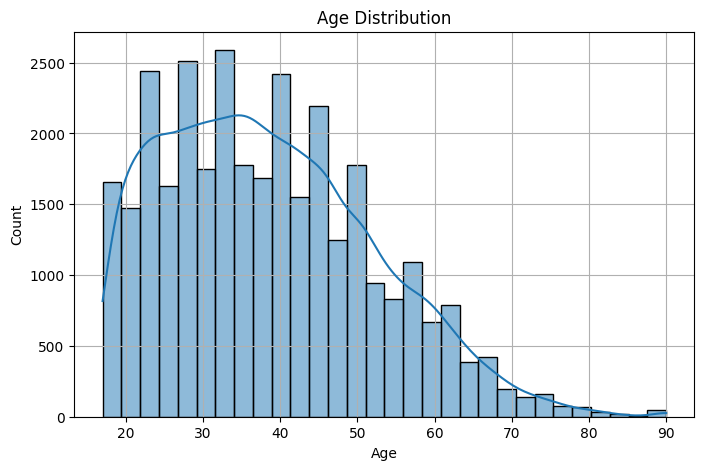

In [41]:
# 1. Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

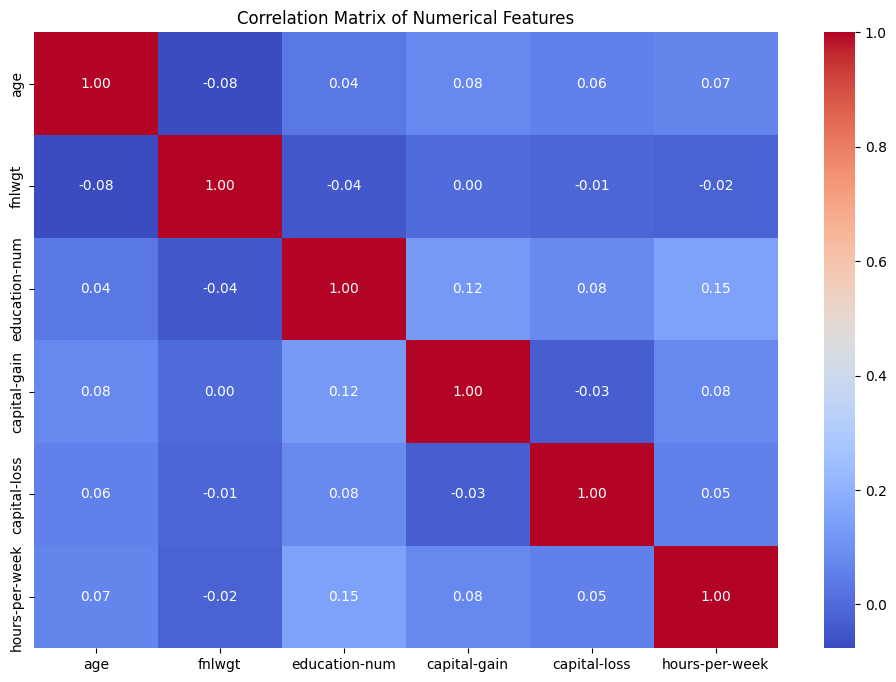

In [42]:
# 2. Correlation Matrix Heatmap
plt.figure(figsize=(12, 8))
corr = data.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

The correlation matrix for numerical features shows that the maximum absolute correlation between any two features is only around 0.15.
This indicates that all numerical features are relatively independent from one another, and there is no strong multicollinearity between them.
As a result, all features can provide potentially unique information for building a predictive model.


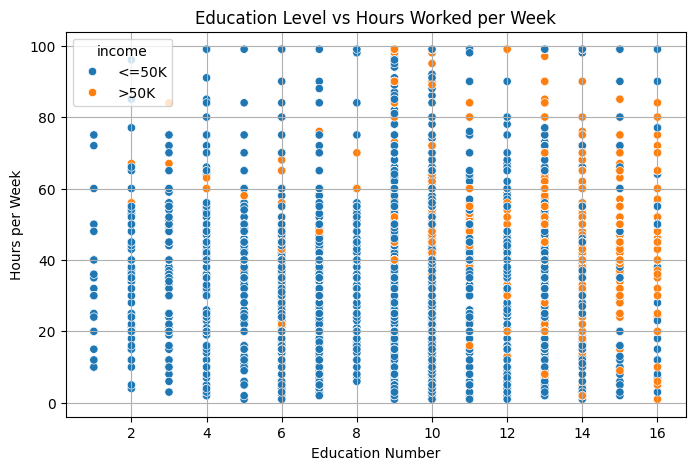

In [43]:
# 3. Education-Num vs. Hours-per-week colored by Income
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='education-num', y='hours-per-week', hue='income')
plt.title('Education Level vs Hours Worked per Week')
plt.xlabel('Education Number')
plt.ylabel('Hours per Week')
plt.grid(True)
plt.show()

We can observe that individuals with a higher education number tend to have higher incomes


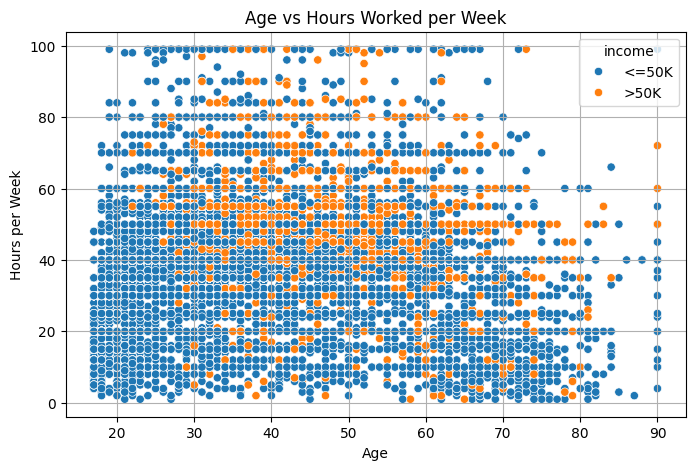

In [44]:
# 4. Age vs. Hours-per-week colored by Income
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='age', y='hours-per-week', hue='income')
plt.title('Age vs Hours Worked per Week')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.grid(True)
plt.show()


It appears that younger individuals typically do not earn much, and there is a noticeable trend where the optimal number of hours worked for both younger and older individuals seems to be around 50 hours per week.


## Dimension number reduction


In [45]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
import plotly.express as px

numerical_data = data_final.select_dtypes(include=['int64', 'float64'])

pca = PCA(n_components=50)
pca_result = pca.fit_transform(numerical_data)


In [46]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(pca_result)
tsne_df = pd.DataFrame(tsne_result, columns=['TSNE-1', 'TSNE-2'])
tsne_df['income'] = data['income']

fig_tsne = px.scatter(tsne_df, x='TSNE-1', y='TSNE-2', color='income', 
                      title='t-SNE: Income vs. Reduced Features',
                      labels={'income': 'Income'})
fig_tsne.show()

In [47]:
print(tsne_df['income'].value_counts())

income
<=50K    24720
>50K      7841
Name: count, dtype: int64


In [48]:
umap_model = UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(pca_result)
umap_df = pd.DataFrame(umap_result, columns=['UMAP-1', 'UMAP-2'])
umap_df['income'] = data['income']

fig_umap = px.scatter(umap_df, x='UMAP-1', y='UMAP-2', color='income', 
                      title='UMAP: Income vs. Reduced Features',
                      labels={'income': 'Income'})
fig_umap.show()

In [49]:
print(umap_df['income'].value_counts())

income
<=50K    24720
>50K      7841
Name: count, dtype: int64


In both the **t-SNE** and **UMAP** visualizations, we can see approximately an even mix of both income classes (`<=50K` and `>50K`). This happens because techniques like **t-SNE** and **UMAP** focus on preserving **local neighborhood structures** rather than global class proportions.

Additionally, we observe many visible clusters across the plots, but they are numerous and spread out rather than forming a few tight groups.


## Clustering


In [50]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score

def find_optimal_kmeans(embeddings, max_clusters=10, random_state=42):
    max_clusters = min(max_clusters, len(embeddings) - 1)
    range_n_clusters = list(range(2, max_clusters + 1))
    inertia_values = []
    silhouette_values = []
    davies_bouldin_values = []

    for n_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
        cluster_labels = kmeans.fit_predict(embeddings)
        inertia_values.append(kmeans.inertia_)
        if len(np.unique(cluster_labels)) > 1:
            silhouette_values.append(silhouette_score(embeddings, cluster_labels))
            davies_bouldin_values.append(davies_bouldin_score(embeddings, cluster_labels))
        else:
            silhouette_values.append(0)
            davies_bouldin_values.append(np.inf)

    inertia_diffs = np.diff(inertia_values)
    inertia_diffs2 = np.diff(inertia_diffs)
    elbow = range_n_clusters[np.argmin(inertia_diffs2) + 1]
    silhouette = range_n_clusters[np.argmax(silhouette_values)]
    davies_bouldin = range_n_clusters[np.argmin(davies_bouldin_values)]

    print(f"KMeans optimal clusters -> elbow: {elbow}, silhouette: {silhouette}, davies_bouldin: {davies_bouldin}")
    return {"elbow": elbow, "silhouette": silhouette, "davies_bouldin": davies_bouldin}

def find_optimal_dbscan(embeddings, eps_values=None, min_samples=5):
    if eps_values is None:
        eps_values = np.linspace(0.5, 3, 10)

    silhouette_values = []
    davies_bouldin_values = []

    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(embeddings)
        n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)

        if n_clusters > 1:
            silhouette_values.append(silhouette_score(embeddings, cluster_labels))
            davies_bouldin_values.append(davies_bouldin_score(embeddings, cluster_labels))
        else:
            silhouette_values.append(-1)
            davies_bouldin_values.append(np.inf)

    silhouette = eps_values[np.argmax(silhouette_values)]
    davies_bouldin = eps_values[np.argmin(davies_bouldin_values)]

    print(f"DBSCAN optimal eps -> silhouette: {silhouette:.3f}, davies_bouldin: {davies_bouldin:.3f}")
    return {"silhouette": silhouette, "davies_bouldin": davies_bouldin}

In [51]:
X = data_final.drop(columns=['income_<=50K', 'income_>50K'])

kmeans_params = find_optimal_kmeans(X)
best_kmeans_clusters = kmeans_params["elbow"]

kmeans = KMeans(n_clusters=best_kmeans_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

dbscan_params = find_optimal_dbscan(X)
best_dbscan_eps = dbscan_params["silhouette"]

dbscan = DBSCAN(eps=best_dbscan_eps, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

true_labels = data['income'].apply(lambda x: 1 if x == '>50K' else 0)

ari_kmeans = adjusted_rand_score(true_labels, kmeans_labels)
ari_dbscan = adjusted_rand_score(true_labels, dbscan_labels)

print(f"Adjusted Rand Index (KMeans): {ari_kmeans:.4f}")
print(f"Adjusted Rand Index (DBSCAN): {ari_dbscan:.4f}")


KMeans optimal clusters -> elbow: 4, silhouette: 10, davies_bouldin: 10
DBSCAN optimal eps -> silhouette: 3.000, davies_bouldin: 0.500
Adjusted Rand Index (KMeans): 0.0409
Adjusted Rand Index (DBSCAN): 0.0282


In [52]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X)

In [53]:
tsne_df_kmeans = pd.DataFrame(tsne_result, columns=['TSNE-1', 'TSNE-2'])
tsne_df_kmeans['Cluster'] = kmeans_labels.astype(str)

fig_kmeans = px.scatter(
    tsne_df_kmeans, 
    x='TSNE-1', 
    y='TSNE-2', 
    color='Cluster', 
    title='K-Means Clustering (TSNE Projection)', 
    color_discrete_sequence=px.colors.qualitative.Set1
)
fig_kmeans.show()

In [54]:
tsne_df_dbscan = pd.DataFrame(tsne_result, columns=['TSNE-1', 'TSNE-2'])
tsne_df_dbscan['Cluster'] = dbscan_labels.astype(str)

fig_dbscan = px.scatter(
    tsne_df_dbscan, 
    x='TSNE-1', 
    y='TSNE-2', 
    color='Cluster', 
    title='DBSCAN Clustering (TSNE Projection)', 
    color_discrete_sequence=px.colors.qualitative.Set1
)
fig_dbscan.show()

### Conclusion

In this analysis, we used **KMeans** and **DBSCAN** clustering algorithms to group individuals based on their features and evaluated the clustering quality using the **Adjusted Rand Index (ARI)**.

The ARI values obtained for both **KMeans** and **DBSCAN** were relatively low, indicating that these clustering algorithms were not able to form meaningful clusters that align well with the target variable, `income`. Specifically:

- **KMeans** produced clusters that do not effectively separate individuals earning more or less than 50K.
- **DBSCAN** also struggled to create well-defined clusters with the given parameters.

The low ARI scores suggest that both **KMeans** and **DBSCAN** cannot be reliably used as predictive models for income classification. This indicates that clustering alone is insufficient for this task.

Therefore, it is clear that a **supervised classification model** should be trained using labeled data to better predict whether someone earns more than 50K or not. Techniques like **Logistic Regression**, **Random Forest**, or **Gradient Boosting** would be more appropriate for this classification problem.
